In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("/content/drive/MyDrive/datasets/salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [11]:
df1 = df.drop(["marital-status","relationship","education-num","native-country","race"],axis = 1)
df1.head()

,age,workclass,fnlwgt,education,occupation,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,234721,11th,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,Female,0,0,40,<=50K


In [8]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [14]:
df1["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [22]:
df2 = df1[~(df1["workclass"] == " ?")]

In [24]:
df2["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [28]:
df2["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [29]:
df3 = df2[~(df2["occupation"]==" ?")]
df3["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [30]:
df3["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [31]:
gender_dummies = pd.get_dummies(df3["sex"]).astype("int")
gender_dummies

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
32556,1,0
32557,0,1
32558,1,0
32559,0,1


In [32]:
df4 = df3.drop(["sex"],axis = 1)
df4

,age,workclass,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,0,0,13,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,0,0,40,<=50K
3,53,Private,234721,11th,Handlers-cleaners,0,0,40,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Tech-support,0,0,38,<=50K
32557,40,Private,154374,HS-grad,Machine-op-inspct,0,0,40,>50K
32558,58,Private,151910,HS-grad,Adm-clerical,0,0,40,<=50K
32559,22,Private,201490,HS-grad,Adm-clerical,0,0,20,<=50K


In [53]:
df5 = pd.concat([df4,gender_dummies],axis=1)
df5.shape

(30718, 11)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df5[["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]])

In [57]:
scaled1 = pd.DataFrame(scaled, columns = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week"])
scaled1.reset_index(drop = True,inplace = True)
df5.reset_index(drop = True,inplace = True)

**PREPROCESSED DATAFRAME**

In [58]:
scaled_data = pd.concat([scaled1,df5[["workclass","education","occupation","salary"," Female"," Male"]]],axis = 1)
scaled_data

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,occupation,salary,Female,Male
0,0.301370,0.043338,0.021740,0.0,0.397959,State-gov,Bachelors,Adm-clerical,<=50K,0,1
1,0.452055,0.047277,0.000000,0.0,0.122449,Self-emp-not-inc,Bachelors,Exec-managerial,<=50K,0,1
2,0.287671,0.137244,0.000000,0.0,0.397959,Private,HS-grad,Handlers-cleaners,<=50K,0,1
3,0.493151,0.150212,0.000000,0.0,0.397959,Private,11th,Handlers-cleaners,<=50K,0,1
4,0.150685,0.220703,0.000000,0.0,0.397959,Private,Bachelors,Prof-specialty,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...
30713,0.136986,0.165563,0.000000,0.0,0.377551,Private,Assoc-acdm,Tech-support,<=50K,1,0
30714,0.315068,0.095589,0.000000,0.0,0.397959,Private,HS-grad,Machine-op-inspct,>50K,0,1
30715,0.561644,0.093914,0.000000,0.0,0.397959,Private,HS-grad,Adm-clerical,<=50K,1,0
30716,0.068493,0.127620,0.000000,0.0,0.193878,Private,HS-grad,Adm-clerical,<=50K,0,1


**VISUALIZING df3 DATAFRAME**

In [59]:
df3.head()

,age,workclass,fnlwgt,education,occupation,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,234721,11th,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,Female,0,0,40,<=50K


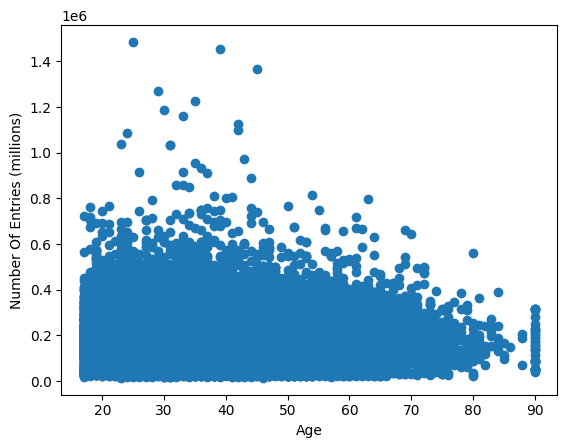

In [75]:
plt.scatter(df3["age"],df3["fnlwgt"])
plt.xlabel("Age")
plt.ylabel("Number Of Entries (millions)")
plt.show()

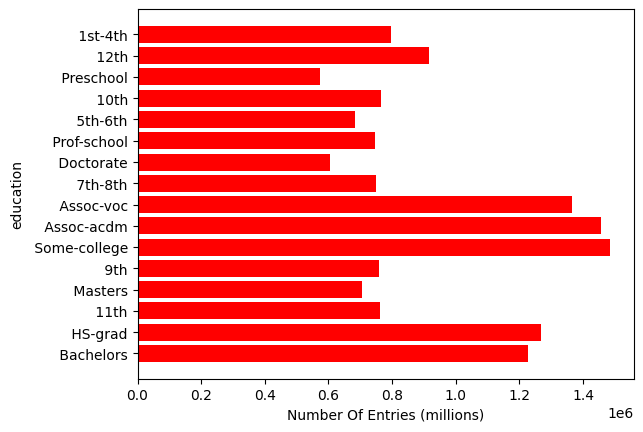

In [81]:
plt.barh(df3["education"],df3["fnlwgt"], color = "r")
plt.ylabel("education")
plt.xlabel("Number Of Entries (millions)")
plt.show()

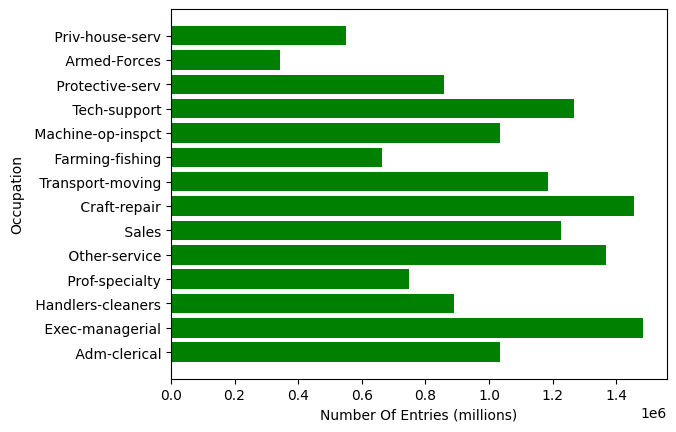

In [95]:
plt.barh(df3["occupation"],df3["fnlwgt"], color = "g")
plt.ylabel("Occupation")
plt.xlabel("Number Of Entries (millions)")
plt.show()

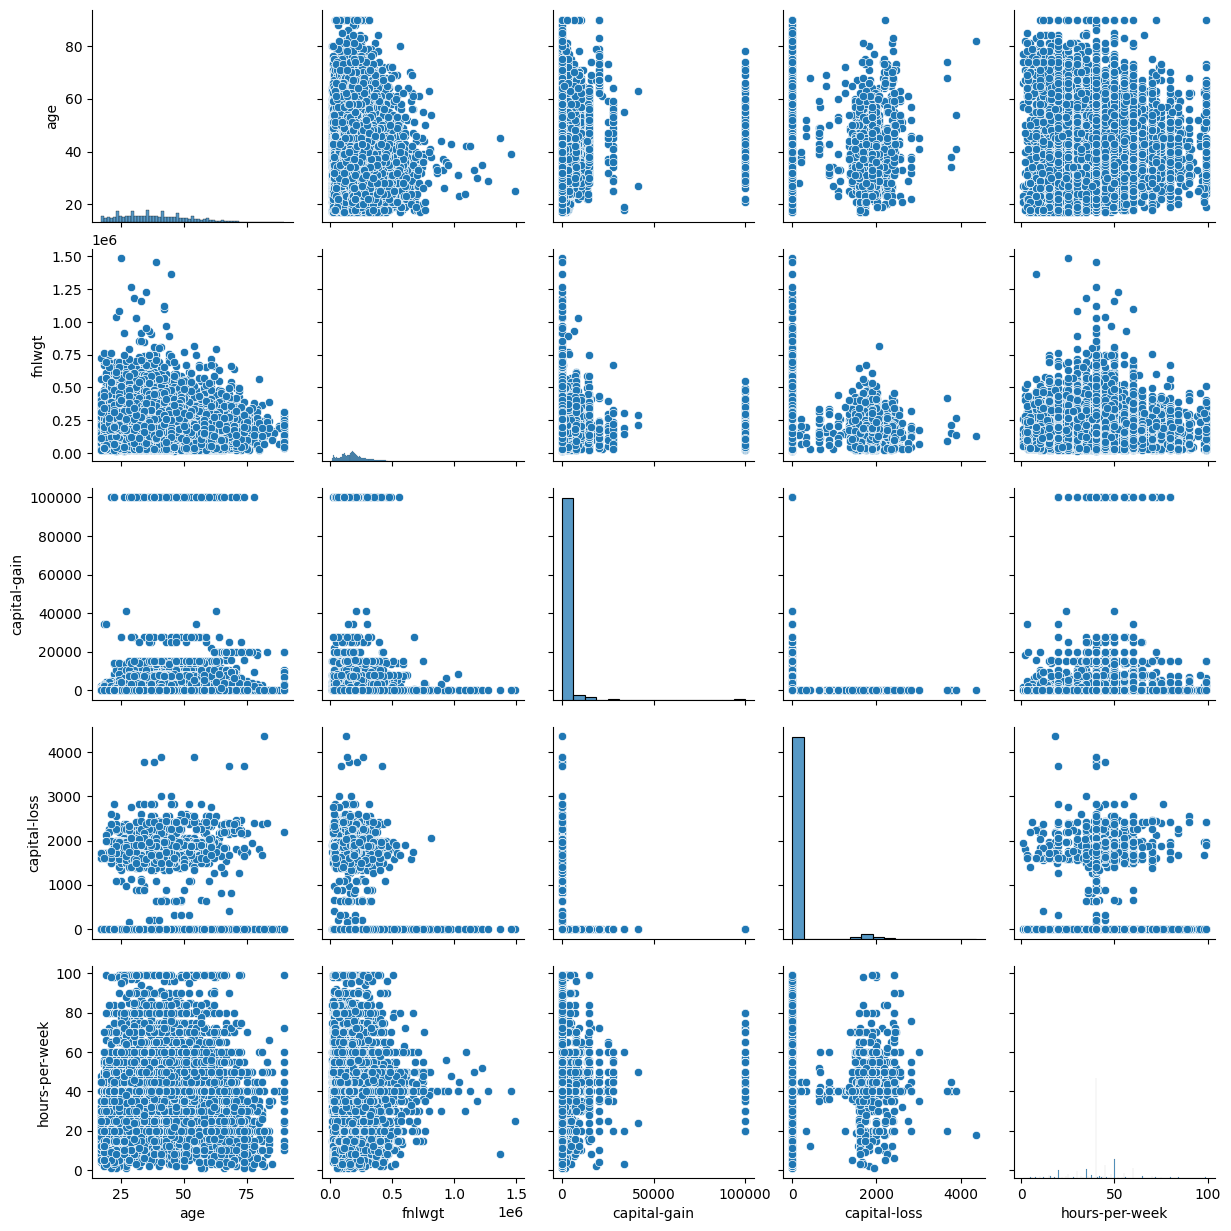

In [96]:
sn.pairplot(df3)